In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx


# CODINGSAMURAI MACHINE LEARNING INTERNSHIP

## Level 3: Advanced (Simplified)

## Project 5: Customer Churn Prediction

In [4]:
# Load dataset
df = pd.read_excel('/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx')

# View first 5 rows
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
df.shape #to know the dimensions

(7043, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [8]:
df.isna().sum()  #chacking if there are any null values

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [9]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [10]:
df['Churn Value'].value_counts()  # to know how many are churned and how many are not

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [11]:
df.drop(columns=['Churn Label'], inplace=True)

In [12]:
df['Churn Value'].value_counts(normalize=True)

Churn Value
0    0.73463
1    0.26537
Name: proportion, dtype: float64

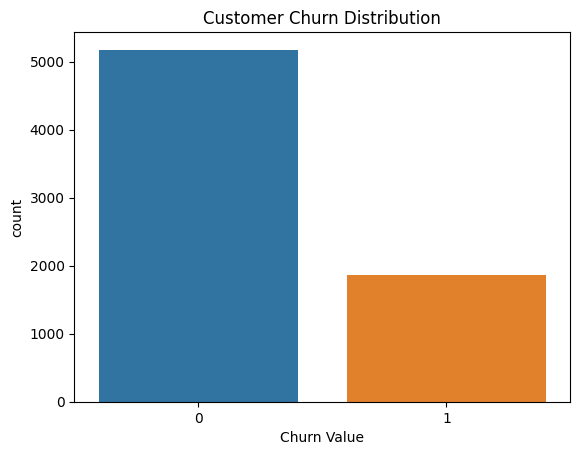

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn Value', data=df)
plt.title("Customer Churn Distribution")    #Visualizing churn values in graphical format
plt.show()

In [14]:
#Making the data into input dataset and output dataset
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']

In [15]:
#to know what are the categorical and what are the numerical features

categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

numerical_cols,categorical_cols


(Index(['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months',
        'Monthly Charges', 'Churn Score', 'CLTV'],
       dtype='object'),
 Index(['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender',
        'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
        'Multiple Lines', 'Internet Service', 'Online Security',
        'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
        'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
        'Total Charges', 'Churn Reason'],
       dtype='object'))

In [16]:
#spliting th einput data into training and testing datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
# applying one-hot encoding

X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns
X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded, join='left', axis=1, fill_value=0)

In [18]:
#a logistic regression model is trained on the training dataset
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_encoded, y_train)

LogisticRegression(max_iter=1000)

In [19]:
y_pred = model.predict(X_test_encoded)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9226401703335699

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      1035
           1       0.85      0.86      0.86       374

    accuracy                           0.92      1409
   macro avg       0.90      0.90      0.90      1409
weighted avg       0.92      0.92      0.92      1409


Confusion Matrix:
 [[978  57]
 [ 52 322]]


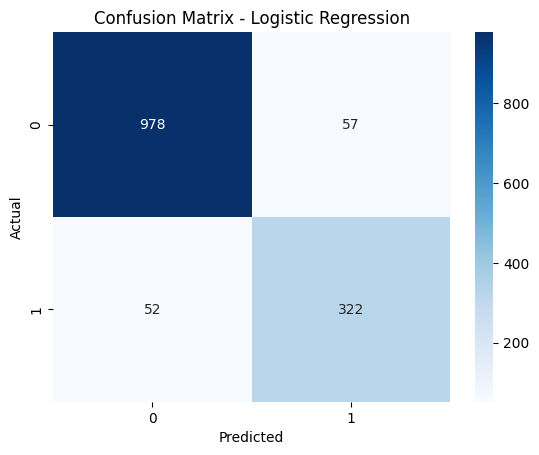

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns               #Visual representation of the confusion matrix in 
                                    # the form of heatmap

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [22]:
#USING AN ADVANCED MODEL --> ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-12-16 17:40:37.821298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765906838.039585      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765906838.103423      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [23]:
#creating an artificial neural network with specific number of layers
ann = Sequential()

ann.add(Dense(16, activation='relu', input_dim=X_train_encoded.shape[1]))
ann.add(Dense(8, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-16 17:40:57.946799: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [24]:
ann.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [25]:
history = ann.fit(
    X_train_encoded,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6083 - loss: 147.0976 - val_accuracy: 0.6264 - val_loss: 0.7845
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6367 - loss: 1.4816 - val_accuracy: 0.7409 - val_loss: 0.5621
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6769 - loss: 1.4922 - val_accuracy: 0.7445 - val_loss: 0.6773
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8289 - loss: 0.4007 - val_accuracy: 0.7693 - val_loss: 0.4944
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8249 - loss: 0.4267 - val_accuracy: 0.8039 - val_loss: 0.3992
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7714 - loss: 0.6122 - val_accuracy: 0.9068 - val_loss: 0.2293
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8224 - loss: 0.5306 - val_accuracy: 0.8137 - val_loss: 0.4062
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8264 - loss: 0.4429 - val_accuracy: 

In [26]:
y_pred_ann = (ann.predict(X_test_encoded) > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ann))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1035
           1       0.75      0.95      0.84       374

    accuracy                           0.90      1409
   macro avg       0.86      0.92      0.88      1409
weighted avg       0.92      0.90      0.91      1409



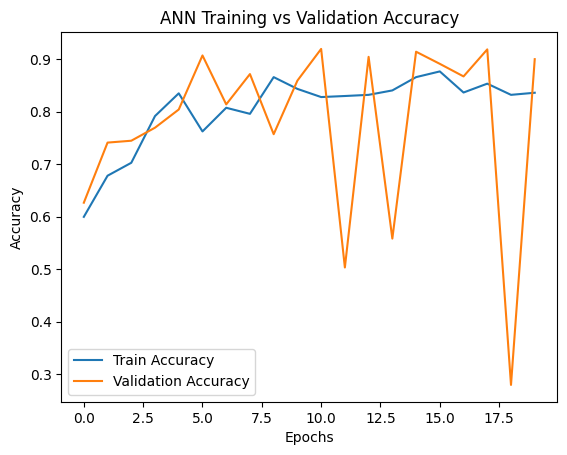

In [27]:
#Vizualizing the accuracy for every epoch

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ANN Training vs Validation Accuracy')
plt.legend()
plt.show()

## Conclusion

In this project, a Customer Churn Prediction system was built using both
Logistic Regression and an Artificial Neural Network. Logistic Regression
provided balanced and interpretable results, while the ANN model achieved
higher recall for churned customers, making it effective for identifying
potential churners. Data visualization techniques were used to analyze model
performance and customer behavior.
